In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
from datetime import timedelta
from datetime import *

# Andres Aranguren

# UNA Challenge


## Loading datasets

In [800]:
#Folder containing the patients' collected data
folder = './patients'
#Number of considered patients

def create_dict(folder_path):
#Create a dictionary to store the patients' records
    d_act = {'Pat_a':[],'Pat_b':[],'Pat_c':[]}
    d_lev = {'Pat_a':[],'Pat_b':[],'Pat_c':[]}
    paths_act = []
    paths_lev = []
    n_p = os.listdir(folder)
    for file_name in os.listdir(folder):
        path_temp = os.path.join(folder,file_name)
        cv_files = os.listdir(path_temp)
        paths_act_t = os.path.join(path_temp,cv_files[0])
        paths_act.append(paths_act_t)
        paths_lev_t = os.path.join(path_temp,cv_files[1])
        paths_lev.append(paths_lev_t)

    for k,v in enumerate(d_act.keys()):
        d_act[v]=pd.read_csv(paths_act[k],header=None)
        d_lev[v]=pd.read_csv(paths_lev[k],header=1)
    return d_act,d_lev




In [801]:
d_act,d_lev=create_dict(folder)

## Tasks 

Visualise - Create plots for the historic blood glucose level by each patient and the historic blood glucose level after meals (we usually look at timestamp_start of the meal + 3 hours worth of data). Feel free to group and slice the data for the individual meals as you see fit.

# Task_1. Create plots for the historic blood glucose level by each patient and the historic 

In [802]:
## Start using the levels csv file 
# Start evaluating for patient A
pA_lev = d_lev['Pat_a'].copy()
pA_act = d_act['Pat_a'].copy()


pB_lev = d_lev['Pat_b'].copy()
pB_act = d_act['Pat_b'].copy()

pC_lev = d_lev['Pat_c'].copy()
pC_act = d_act['Pat_c'].copy()

var = ['Gerätezeitstempel','Aufzeichnungstyp','Glukosewert-Verlauf mg/dL']
#subdataset containing our variables of interest
dal = pA_lev[var]
dbl = pB_lev[var]
dcl = pC_lev[var]
print('Patient A records:',pA_lev.shape)
print('Patient B records:',pB_lev.shape)
print('Patient C records:',pC_lev.shape)



Patient A records: (1199, 19)
Patient B records: (1369, 19)
Patient C records: (1423, 19)


In [803]:
#Lets explore a little our dataset

#First get data types of columns in dataframe
dal.dtypes

Gerätezeitstempel             object
Aufzeichnungstyp               int64
Glukosewert-Verlauf mg/dL    float64
dtype: object

In [594]:
##Check for Nan values under the entire dataframe
dal.isnull().values.any()
dal.isnull().sum()

dbl.isnull().values.any()
dbl.isnull().sum()

dcl.isnull().values.any()
dcl.isnull().sum()



Gerätezeitstempel              0
Aufzeichnungstyp               0
Glukosewert-Verlauf mg/dL    121
dtype: int64

In [595]:
## Considering the number of records and since our variable of interes is the glucose records we will be dropping the Nan values
dal = dal.dropna()
print('Patient A dimension after dropping Nan values:',dal.shape)

dbl = dbl.dropna()
print('Patient B dimension after dropping Nan values:',dbl.shape)

dcl = dcl.dropna()
print('Patient C dimension after dropping Nan values:',dcl.shape)


Patient A dimension after dropping Nan values: (1022, 3)
Patient B dimension after dropping Nan values: (1255, 3)
Patient C dimension after dropping Nan values: (1302, 3)


In [596]:
dal['Gerätezeitstempel']=pd.to_datetime(dal['Gerätezeitstempel'])
dbl['Gerätezeitstempel']=pd.to_datetime(dbl['Gerätezeitstempel'])
dcl['Gerätezeitstempel']=pd.to_datetime(dcl['Gerätezeitstempel'])


In [597]:
# We have 11 days of collected data for patient A


dal['Gerätezeitstempel'].describe()


count                    1022
unique                   1022
top       2021-02-24 07:57:00
freq                        1
first     2021-02-14 16:52:00
last      2021-02-25 16:49:00
Name: Gerätezeitstempel, dtype: object

## According to the description of the 'Gerätezeitstempel' tiemstamp column the data was collected in an interval of 11 days

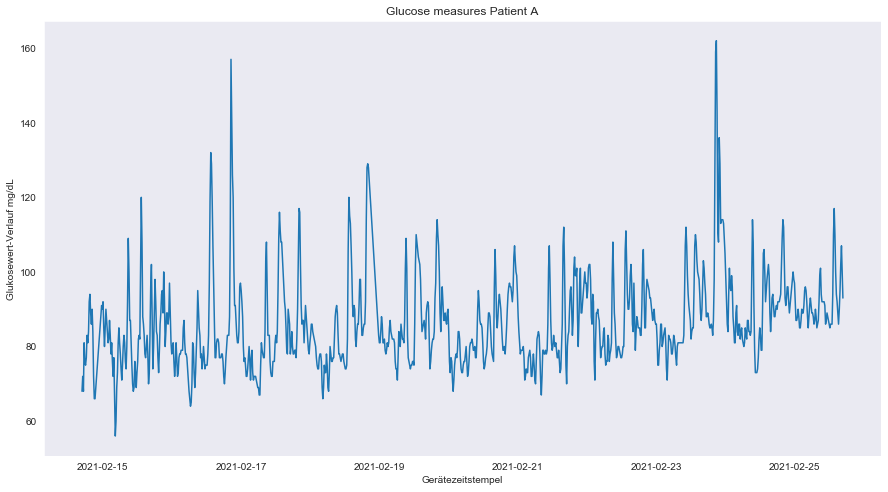

In [598]:
## Glucose data patient A
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Gerätezeitstempel', y = 'Glukosewert-Verlauf mg/dL',data = dal)
plt.title('Glucose measures Patient A')
plt.grid()
plt.show()

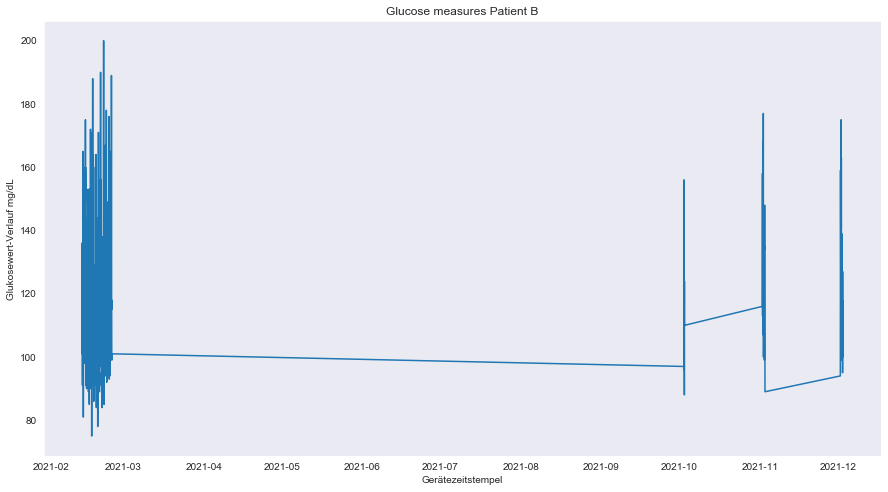

In [599]:
#Glucose data patient B
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Gerätezeitstempel', y = 'Glukosewert-Verlauf mg/dL',data = dbl)
plt.title('Glucose measures Patient B')
plt.grid()
plt.show()

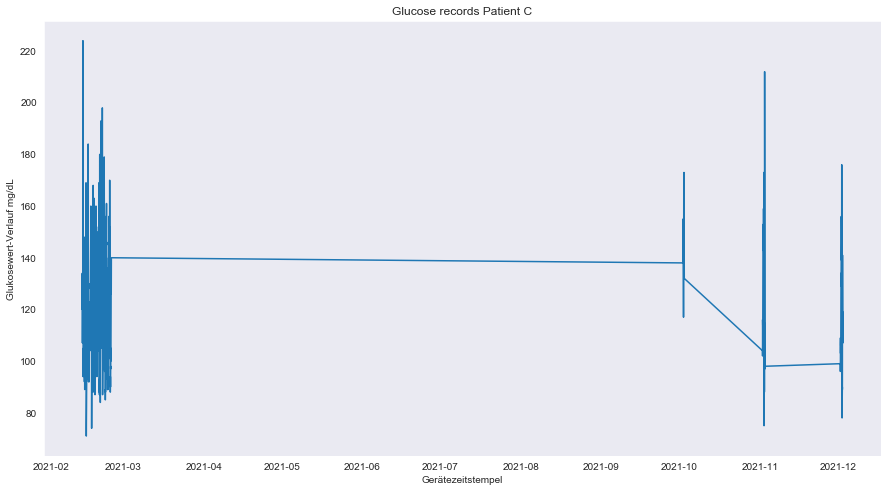

In [600]:
#Glucose data patient C
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Gerätezeitstempel', y = 'Glukosewert-Verlauf mg/dL',data = dcl)
plt.title('Glucose records Patient C')
plt.grid()
plt.show()

## According to the time series there were some problems in the recordings of the glucose measures for Patient B & C therefore we will be reducing the timeseries
## timespan to 10 days which are the reference of Patient A in order to perfrom a coherent analysis in similar time intervals


In [601]:
#Reducing time interval of patient B to 11 days
dbl= dbl[(dbl['Gerätezeitstempel']>='2021-02-14 00:00:00')& (dbl['Gerätezeitstempel']<='2021-02-25 00:00:00')]

In [602]:
#Reducing time interval of patient C to 11 days
dcl= dbl[(dbl['Gerätezeitstempel']>='2021-02-13 00:00:00')& (dbl['Gerätezeitstempel']<='2021-02-24 00:00:00')]

In [603]:
dal['Patient']='A'
dbl['Patient']='B'
dcl['Patient']='C'
# We'll be appending the three dataframes in order to work with a single one to better visualize the timeseries for the three patients



C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [604]:
#Create a single dataframe containing the three patients glucose measures
dpl = pd.concat([dal,dbl,dcl],ignore_index=True)

In [726]:
dpl.dtypes

Gerätezeitstempel            datetime64[ns]
Aufzeichnungstyp                      int64
Glukosewert-Verlauf mg/dL           float64
Patient                              object
dtype: object

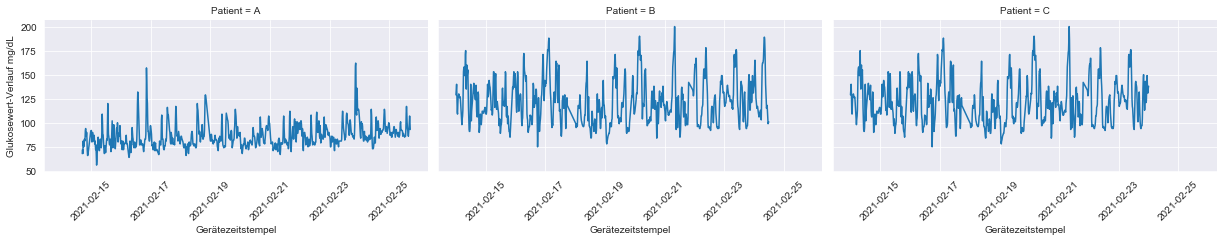

In [605]:
g = sns.FacetGrid(dpl,col='Patient',aspect=1.9)

g.map(sns.lineplot,'Gerätezeitstempel','Glukosewert-Verlauf mg/dL')
g.set_xticklabels(rotation=45)
plt.show()

In [679]:
dpl

,Gerätezeitstempel,Aufzeichnungstyp,Glukosewert-Verlauf mg/dL,Patient
0,2021-02-18 10:57:00,0,77.0,A
1,2021-02-18 11:12:00,0,78.0,A
2,2021-02-18 11:27:00,0,78.0,A
3,2021-02-18 11:42:00,0,76.0,A
4,2021-02-18 11:57:00,0,75.0,A
...,...,...,...,...
2870,2021-02-18 10:04:00,0,115.0,C
2871,2021-02-18 10:19:00,0,102.0,C
2872,2021-02-18 10:34:00,0,118.0,C
2873,2021-02-18 10:49:00,0,127.0,C


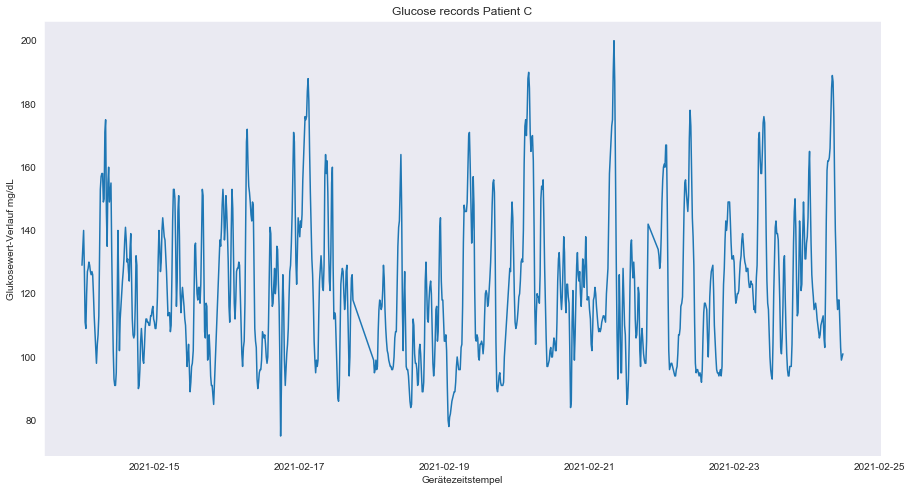

In [654]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Gerätezeitstempel', y = 'Glukosewert-Verlauf mg/dL',data = dbl)
plt.title('Glucose records Patient C')
plt.grid()
plt.show()

In [724]:
dpl.dtypes

Gerätezeitstempel            datetime64[ns]
Aufzeichnungstyp                      int64
Glukosewert-Verlauf mg/dL           float64
Patient                              object
dtype: object

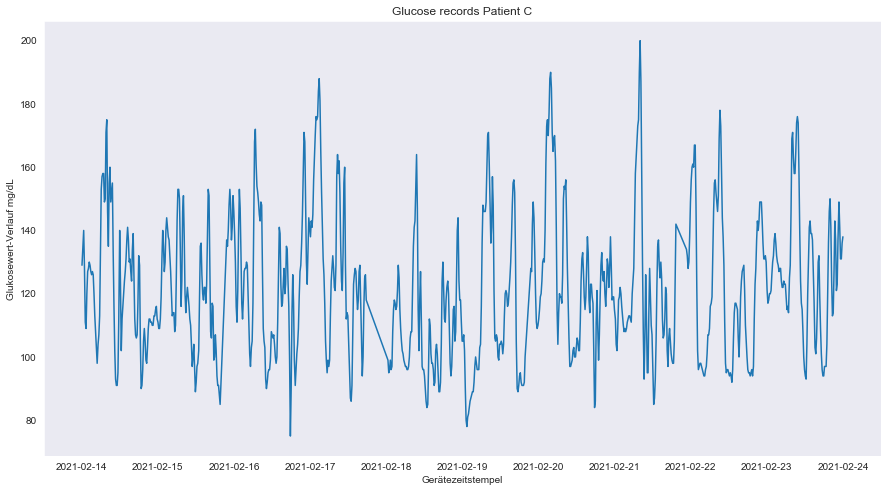

In [655]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Gerätezeitstempel', y = 'Glukosewert-Verlauf mg/dL',data = dcl)
plt.title('Glucose records Patient C')
plt.grid()
plt.show()

# Task_2 historic blood glucose level after meals
## Consider the activities of the patient

In [608]:
pA_act=pA_act.drop(labels=0,axis=0)
pB_act=pB_act.drop(labels=0,axis=0)
pC_act=pC_act.drop(labels=0,axis=0)
pA_act['Patient']='A'
pB_act['Patient']='B'
pC_act['Patient']='C'

In [609]:
#Let us concatenate the activities files into a single dataframe 
dpa = pd.concat([pA_act,pB_act,pC_act],ignore_index=True)
dpa = dpa.drop(pA_act.columns[[5, 6, 7,8]], axis=1)
header= ['Reg_1','Reg_2','Meal','Description','Gerätezeitstempel','Patient']
dpa.columns=header
dpa['Gerätezeitstempel']=pd.to_datetime(dpa['Gerätezeitstempel'])

In [666]:
## Function used to get the list of unique activities of a specific patient
def get_meals(patient):
    t= dpa[dpa['Patient']==patient]
    meals=list(t['Meal'].unique())
    return meals

In [779]:
#Patients list of activites
meals_a = get_meals('A')
meals_b = get_meals('B')
meals_c = get_meals('C')

In [781]:
#We need to extract the times in which the patient consumed the meal and the following three hours records of Glucose
#The following function returns a dataframe containing the glucose records of a specifi patient, for a specified meal in a three hour interval
#

def extract_meals_data(patient,meal):
    dfd=pd.DataFrame()
    #temp = dpa[dpa['Patient']==patient]
    #meals_p = temp['Meal'].unique()
    dft = dpa[(dpa['Meal']==meal)&(dpa['Patient']==patient)]
    times_in = dft['Gerätezeitstempel']
    times_fin = dft['Gerätezeitstempel']+timedelta(hours=3)
    c=1
    for a,b in zip(list(times_in),list(times_fin)):    
        df_t= dpl[(dpl['Gerätezeitstempel']>=a.replace(tzinfo=None))& (dpl['Gerätezeitstempel']<=b.replace(tzinfo=None))&(dpl['Patient']==patient)]
        df_t['Meal']=meal
        df_t['Meal_number']=c
        c+=1
        dfd = pd.concat([dfd,df_t],ignore_index=True)
    dfd['hours']=dfd.Gerätezeitstempel.dt.hour
    return dfd



## Let us do some plots to evaluate the levels of glucose during different activities

In [788]:
# Function used to plot the glucose records for a specific patient and a specific meal 
def graph_meal(data):
    g = sns.FacetGrid(data, col='Meal_number', height=3.5, aspect=2)
    g.map(sns.lineplot,'hours','Glukosewert-Verlauf mg/dL')
    g.set_xticklabels(rotation=45)
    g.set_titles('Activity:'+data['Meal'][0]+'   '+'Patient:'+data['Patient'][0])
    plt.show()

## Patient A presents the following activities ['MEAL_BREAKFAST','MEAL_LUNCH','MEAL_SNACK','ACTVITY_EASY','MEAL_DINNER','DRINK','ACTVITY_MODERATE']

In [797]:
# The following graph presents the glucose levels for the three breakfast meals recorded of patient A
patient='A'


d_b= extract_meals_data(patient,'MEAL_BREAKFAST')
d_ml=extract_meals_data(patient,'MEAL_LUNCH')
d_ms = extract_meals_data(patient,'MEAL_SNACK')
d_md = extract_meals_data(patient,'MEAL_DINNER')
d_am = extract_meals_data(patient,'ACTVITY_MODERATE')


C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


# Patient A analysis

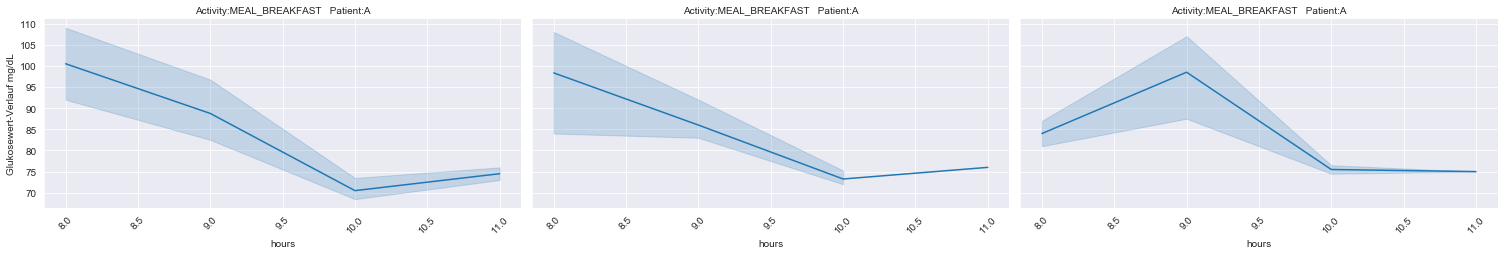

In [792]:
graph_meal(d_b)

## Breakfast represent the meal where glucose levels peaks, almost immediatly after its consumption due to the high carbohydrate content, hence rapid energy transformation. The levels rapidly decrease the first two hours, followd by a stabilization in the third hour

## Evalaute Meal_Lunch

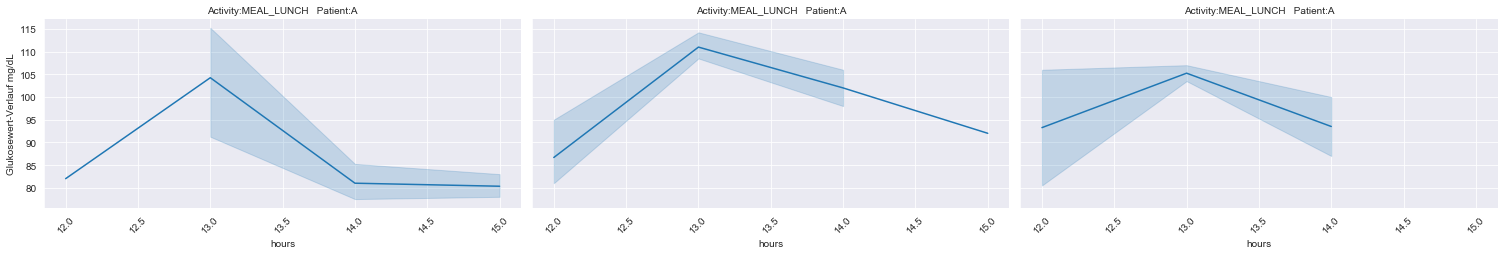

In [793]:
graph_meal(d_ml)

## Lunch is the meal that leads to the highest levels of glucose in the patient, this peak is reached one hour after the consumption, followed by a decrease in the successive two hours

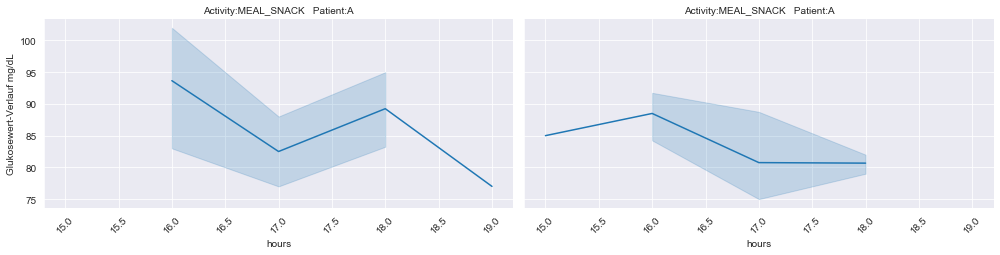

In [795]:
graph_meal(d_ms)

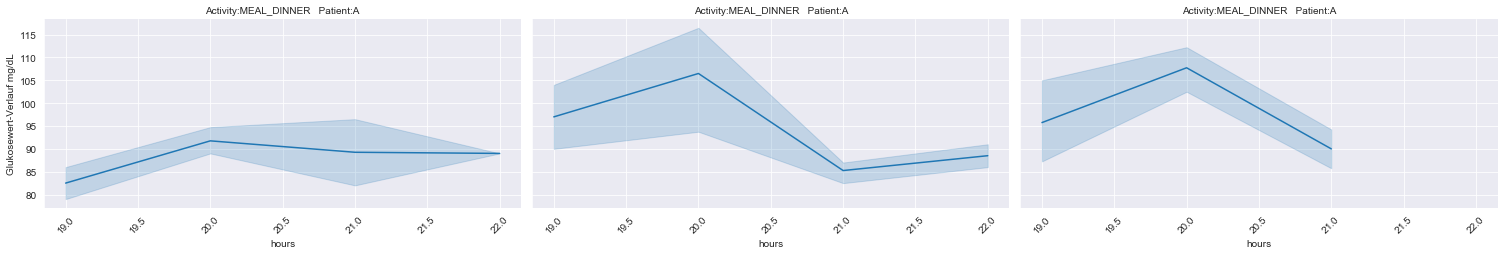

In [798]:
graph_meal(d_md)

## Dinner does not has a significant effect in the patients glucose levels there is a slight increase the first hour and a furhter decrease in the last two hours

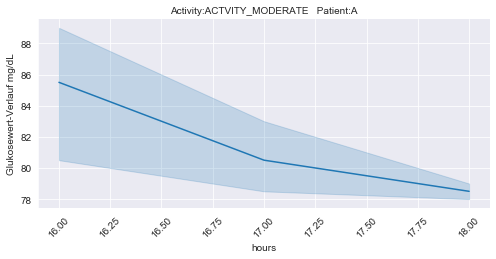

In [799]:
graph_meal(d_am)

## Moderate activity suggests to have a major role decreasing glucose levels, for Patient A, in an interval of one hour and a halft glucose levels decreased from 86 up to 78

# Clustering

In [804]:
## For the clustering algorithm I would use a Kmeans approach by selecting first the meals and glucose levels as the main features for later forming the clusters,
## We would have to be careful however when selecting the centroids in order the algorithm to converge

,Gerätezeitstempel,Aufzeichnungstyp,Glukosewert-Verlauf mg/dL,Patient
0,2021-02-18 10:57:00,0,77.0,A
1,2021-02-18 11:12:00,0,78.0,A
2,2021-02-18 11:27:00,0,78.0,A
3,2021-02-18 11:42:00,0,76.0,A
4,2021-02-18 11:57:00,0,75.0,A
